In [1]:
from mongodbcredentials import CONNECTION_STRING_JAN_2
from pymongo import MongoClient
import certifi
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from twitter_modules import get_mostcommon_posts, save_results, database_as_dictionary, pos_neg_count, plot_topics

In [2]:
client = MongoClient(CONNECTION_STRING_JAN_2, tlsCAFile=certifi.where())

In [3]:
twitter_facemasks = client.TwitterFacemask3
twitter_lockdown = client.TwitterLockdown3
twitter_pcr = client.TwitterPCR3
twitter_pfizer = client.TwitterPfizer3
twitter_quarantine = client.TwitterQuarantine3
twitter_restrictions = client.TwitterRestrictions3
twitter_vaccine = client.TwitterVaccine3

In [4]:
analyzer = SentimentIntensityAnalyzer()

In [5]:
facemasks_dict = database_as_dictionary(twitter_facemasks, analyzer)
lockdown_dict = database_as_dictionary(twitter_lockdown, analyzer)
pcr_dict = database_as_dictionary(twitter_pcr, analyzer)
pfizer_dict = database_as_dictionary(twitter_pfizer, analyzer)
quarantine_dict = database_as_dictionary(twitter_quarantine, analyzer)
restrictions_dict = database_as_dictionary(twitter_restrictions, analyzer)
vaccine_dict = database_as_dictionary(twitter_vaccine, analyzer)

In [6]:
facemasks_sentiment = pos_neg_count(facemasks_dict)
lockdown_sentiment = pos_neg_count(lockdown_dict)
pcr_sentiment = pos_neg_count(pcr_dict)
pfizer_sentiment = pos_neg_count(pfizer_dict)
quarantine_sentiment = pos_neg_count(quarantine_dict)
restrictions_sentiment = pos_neg_count(restrictions_dict)
vaccine_sentiment = pos_neg_count(vaccine_dict)

In [7]:
list_of_topics = ['Facemasks', 'Lockdown', 'PCR', 'Pfizer', 'Quarantine', 'Restrictions', 'Vaccine']

In [8]:
query_dpts = []
positive = []
negative = []
neutral = []

for sentiment in facemasks_sentiment, lockdown_sentiment, pcr_sentiment, \
    pfizer_sentiment, quarantine_sentiment, restrictions_sentiment, vaccine_sentiment:
    positive += [sentiment['pos_perc']]
    negative += [sentiment['neg_perc']]
    neutral += [sentiment['neu_perc']]

query_dpts += [positive, negative, neutral]

<Figure size 432x288 with 0 Axes>

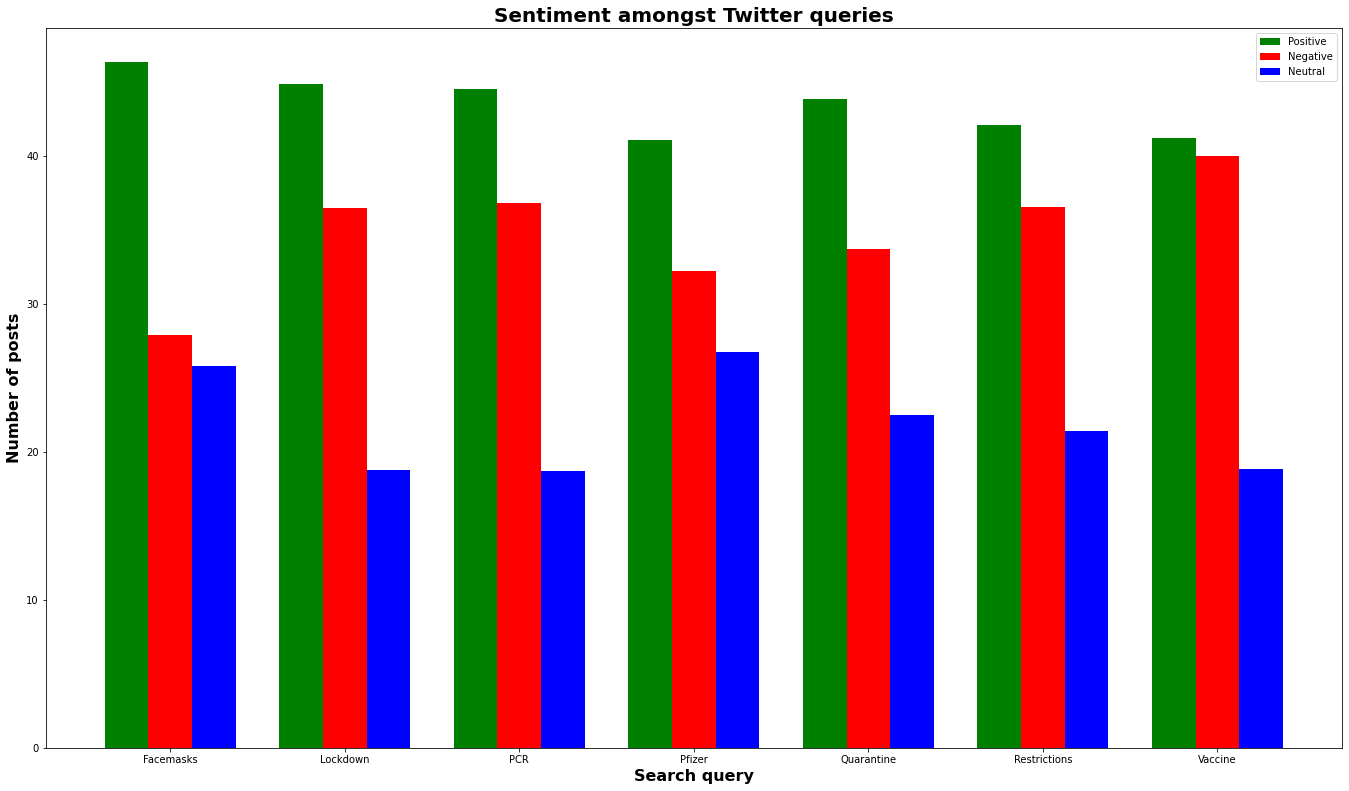

In [9]:
plot_topics(list_of_topics, query_dpts)